## 1. Introduction to Seaborn
### What is Seaborn?

Seaborn is a Python visualization library based on Matplotlib, offering high-level interfaces for creating attractive and informative statistical graphics.

- Installation of Seaborn

``` python 
pip install seaborn


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt


## 2. Basic Seaborn Functionalities
### Seaborn’s Built-in Datasets

Seaborn comes with several datasets that are useful for learning and experimenting.

In [2]:
sns.get_dataset_names()
df = sns.load_dataset('tips')
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Basic Plotting: Scatter Plot

- Introduction to the scatterplot() function for creating scatter plots.

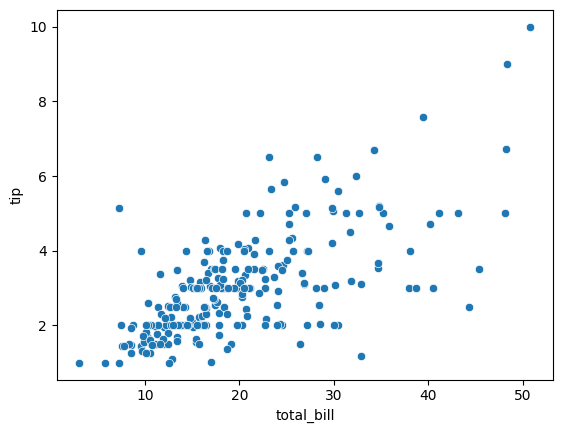

In [3]:
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.show()


## 3. Categorical Plots
### Bar Plot

Introduction to bar plots using Seaborn.

Bar plots help compare categories, and Seaborn allows easy handling of categorical data with built-in functions.

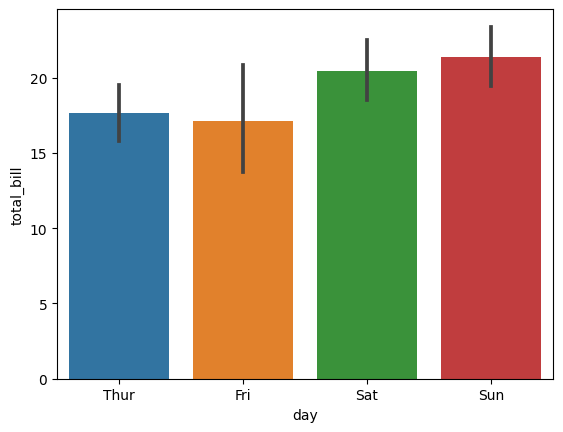

In [4]:
sns.barplot(x='day', y='total_bill', data=df)
plt.show()


###  Count Plot

Creating count plots for categorical data.

Count plots show the number of occurrences of categorical data, giving a quick overview of the distribution.

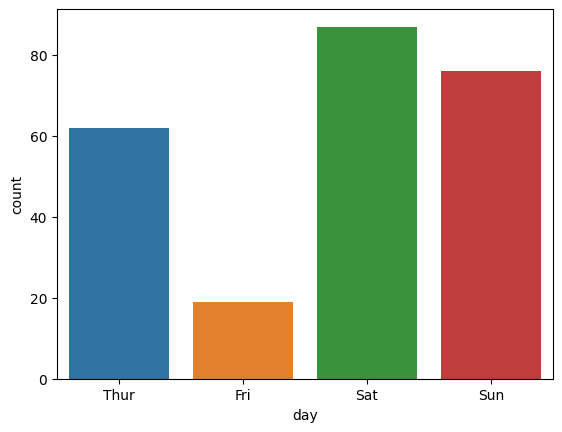

In [5]:
sns.countplot(x='day', data=df)
plt.show()


### Box Plot

Plotting data distributions using a box plot.

Box plots show the distribution of a dataset and identify outliers through quartiles and the median.



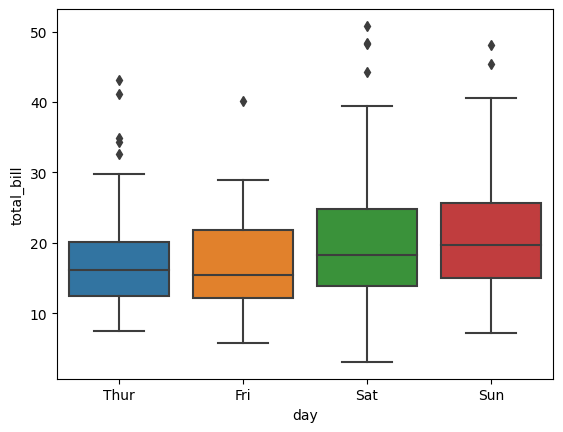

In [6]:
sns.boxplot(x='day', y='total_bill', data=df)
plt.show()


## 4. Visualizing Distributions
### Histogram

Using Seaborn's histplot() to visualize the distribution of a dataset.

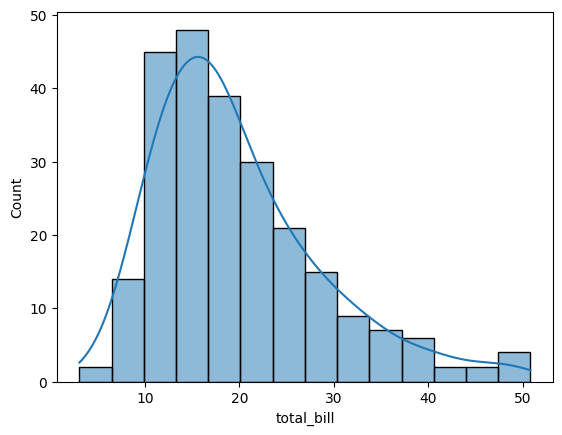

In [7]:
sns.histplot(df['total_bill'], kde=True)
plt.show()


Histograms are essential for understanding the distribution of numerical data. The kde=True option adds a Kernel Density Estimate line for smoother distribution.

### KDE Plot

Visualizing the probability density function using kdeplot().

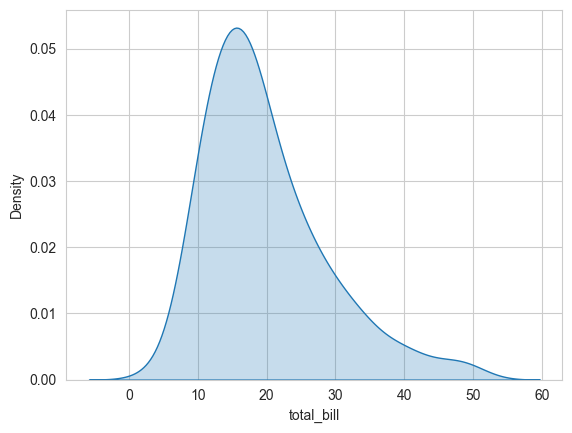

In [18]:
sns.kdeplot(df['total_bill'], shade=True)
plt.show()


KDE plots provide a smoothed continuous curve to estimate the probability density function of the data.

## 5. Pair Plot (Exploratory Data Analysis)
### Creating Pair Plots

A pair plot is an excellent way to visualize relationships across an entire dataset.

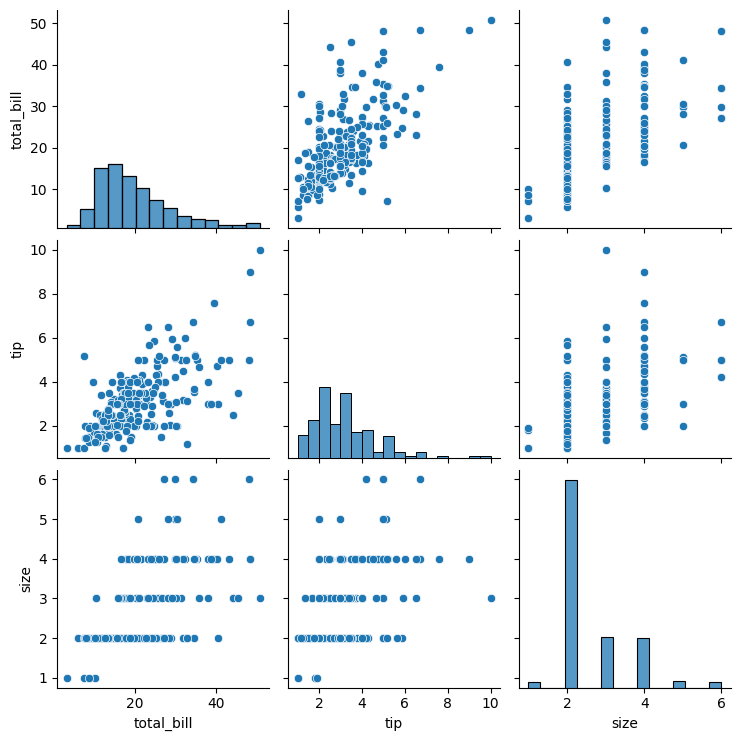

In [9]:
sns.pairplot(df)
plt.show()


Pair plots show the pairwise relationship in a dataset through scatter plots and histograms for numerical columns, giving an exploratory view of data correlations and trends.

## 6. Heatmaps
### Correlation Heatmap

Visualizing the correlation between numerical variables using a heatmap.

Heatmaps are useful for visualizing the strength of relationships between multiple variables. The annot=True option adds the correlation values to the plot, making it more informative.



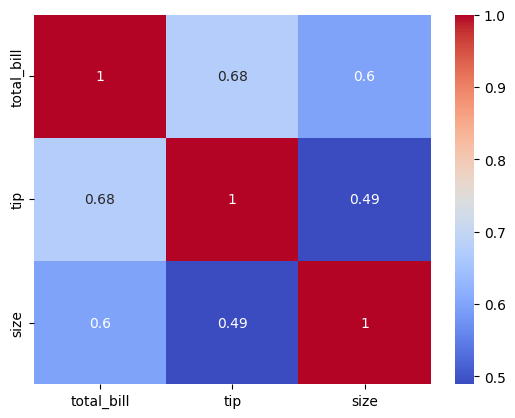

In [10]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


## 7. Advanced Customization
### Seaborn Styles

Changing the aesthetics of Seaborn plots.

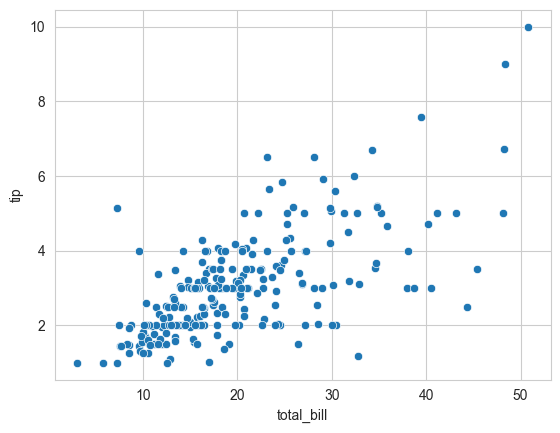

In [11]:
sns.set_style('whitegrid')
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.show()


Seaborn provides several built-in styles (darkgrid, whitegrid, dark, white, ticks) for enhancing plot appearance, making it easy to improve visual appeal.

### Facet Grids

Plotting multiple plots based on different categories.

Facet Grids allow you to create multiple plots that show data from different subsets, making it easier to compare different categories side-by-side.



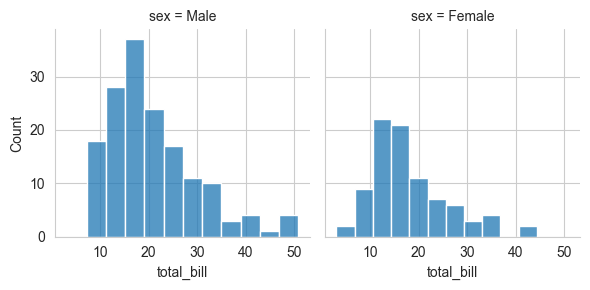

In [12]:
g = sns.FacetGrid(df, col='sex')
g.map(sns.histplot, 'total_bill')
plt.show()


## 8. Regression Plots
### Linear Regression Plot

Plotting linear regression lines with Seaborn.

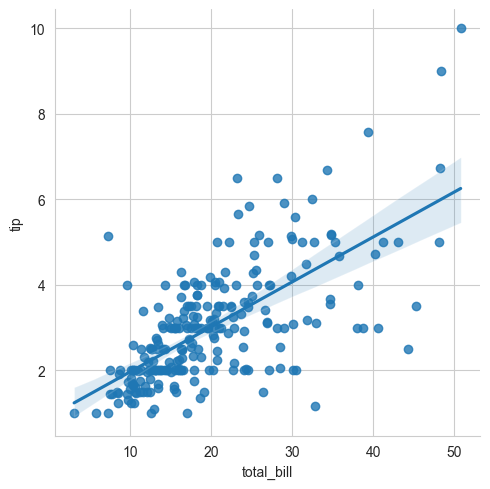

In [13]:
sns.lmplot(x='total_bill', y='tip', data=df)
plt.show()


Regression plots are essential for identifying trends in data. Seaborn’s lmplot() can automatically plot a regression line and provide confidence intervals, making it highly useful for statistical analysis.

## 9. Violin Plot
### Visualizing Distributions

Combining box plots and KDE with a violin plot.

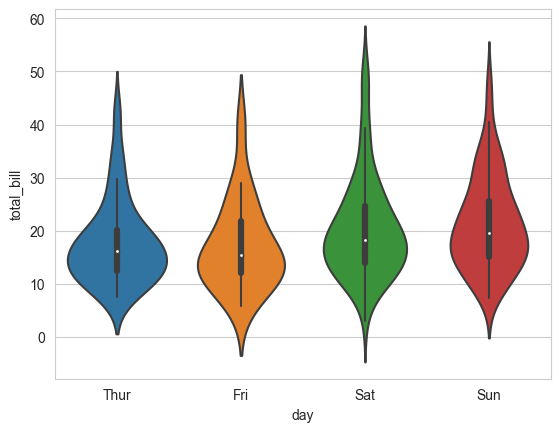

In [14]:
sns.violinplot(x='day', y='total_bill', data=df)
plt.show()


Violin plots are a combination of box plots and KDE plots, giving a fuller picture of data distribution. They are great for understanding the distribution and density of data at the same time.

## 10. Swarm Plot
### Displaying Data Points with Categorical Data

Using swarm plots to show individual data points.

Swarm plots are ideal for showing each individual data point on top of categorical variables, providing more information on the distribution.


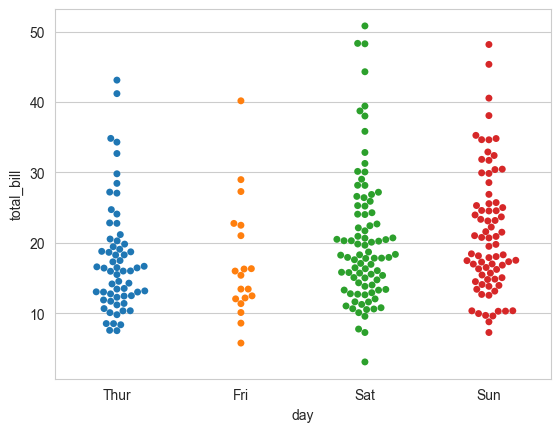

In [15]:
sns.swarmplot(x='day', y='total_bill', data=df)
plt.show()


## 11. Combining Plots
### Box Plot and Swarm Plot

Combining two plots to provide more insight.

By overlaying a swarm plot on top of a box plot, we can show the distribution and individual data points together, enhancing the overall visual analysis.

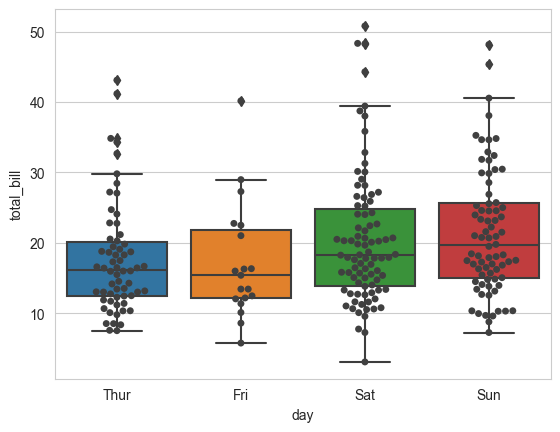

In [16]:
sns.boxplot(x='day', y='total_bill', data=df)
sns.swarmplot(x='day', y='total_bill', data=df, color='.25')
plt.show()


In [21]:
import yfinance as yf

stock_data = yf.download('Tatamotors.NS', start='2024-01-01', end='2024-10-01')
stock_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-01,785.000000,798.700012,781.049988,790.599976,788.167725,12570717
2024-01-02,800.500000,804.000000,779.000000,784.400024,781.986877,13791090
2024-01-03,786.049988,790.000000,776.250000,781.450012,779.045959,8559060
2024-01-04,798.000000,801.799988,791.299988,795.750000,793.301941,14298444
2024-01-05,799.000000,805.900024,787.099976,790.950012,788.516724,11091198


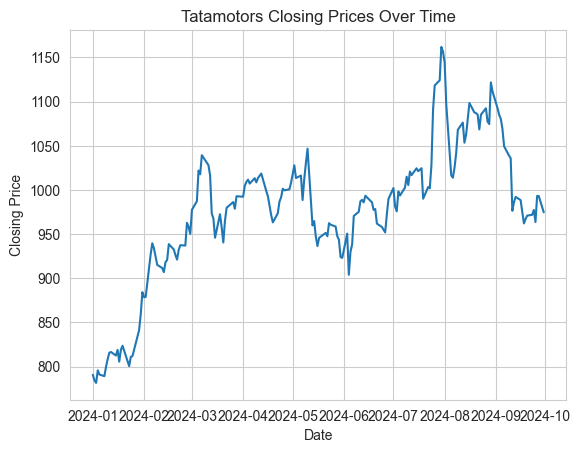

In [22]:
sns.lineplot(x=stock_data.index, y=stock_data['Close'])
plt.title('Tatamotors Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


## Distribution of Stock Returns

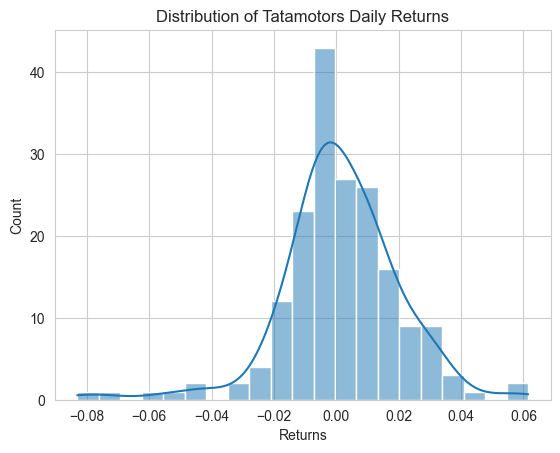

In [24]:
stock_data['Returns'] = stock_data['Close'].pct_change()
sns.histplot(stock_data['Returns'].dropna(), kde=True)
plt.title('Distribution of Tatamotors Daily Returns')
plt.show()


## Volume-Weighted Average Price (VWAP)
Calculating and Plotting VWAP

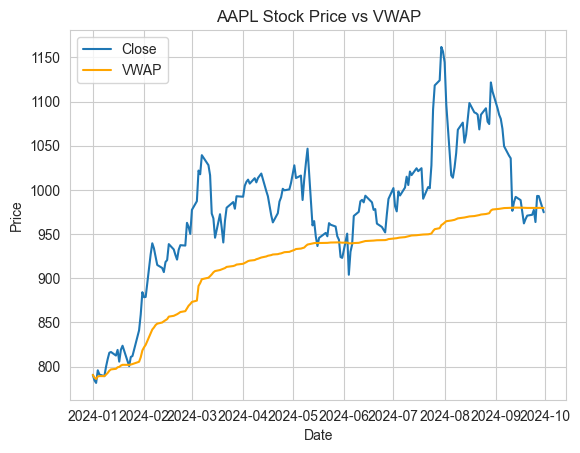

In [27]:
stock_data['VWAP'] = (stock_data['Volume'] * stock_data['Close']).cumsum() / stock_data['Volume'].cumsum()

sns.lineplot(x=stock_data.index, y=stock_data['Close'], label='Close')
sns.lineplot(x=stock_data.index, y=stock_data['VWAP'], label='VWAP', color='orange')
plt.title('AAPL Stock Price vs VWAP')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


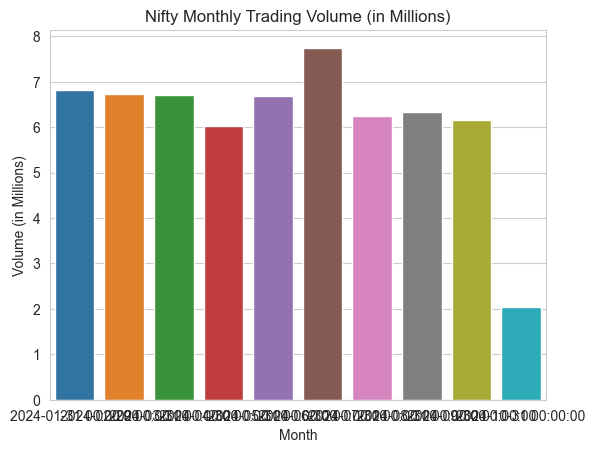

In [33]:
# Solution Starter Code:
goog_data = yf.download('^NSEI', start='2024-01-01')

# Resample by month and calculate total volume per month
goog_data['Volume_M'] = goog_data['Volume'] / 1_000_000
monthly_volume = goog_data['Volume_M'].resample('M').sum()

# Plot the monthly volume
sns.barplot(x=monthly_volume.index, y=monthly_volume)
plt.title('Nifty Monthly Trading Volume (in Millions)')
plt.xlabel('Month')
plt.ylabel('Volume (in Millions)')
plt.show()


## Practice Exercises

- Download stock data for ACC.NS from 2018 to the present. Create a line plot showing the stock's opening price (Open) over time. Customize the plot with labels and a title. 
- Calculate the daily returns for Reliance stock from 2019 to present. Plot the distribution of these returns using a histogram with KDE.
- Download stock data for Bajaj Auto from 2017 to 2024. Compute the 30-day and 100-day moving averages of the closing price. Plot both moving averages along with the closing price.
- Download stock price data for four major companies Create a heatmap showing the correlation between their closing prices.